In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
# do not forget t change the file for each local computer
df = pd.read_csv('/Users/mahmoud/Documents/Flatiron/Project_1_Microsoft_Movie_Studio/1_Data_Wranging/genre_profit.csv')
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [103]:
df

,title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
0,#Horror,2015,101.00000,Crime,16,"Nov 20, 2015","$1,500,000",0.00000,0.00000
1,#Horror,2015,101.00000,Drama,16,"Nov 20, 2015","$1,500,000",0.00000,0.00000
2,#Horror,2015,101.00000,Horror,16,"Nov 20, 2015","$1,500,000",0.00000,0.00000
3,10 Cloverfield Lane,2016,103.00000,Drama,54,"Mar 11, 2016","$5,000,000",72082999.00000,108286422.00000
4,10 Cloverfield Lane,2016,103.00000,Horror,54,"Mar 11, 2016","$5,000,000",72082999.00000,108286422.00000
...,...,...,...,...,...,...,...,...,...
7198,Zulu,2013,110.00000,Drama,82,"Dec 31, 2013","$16,000,000",0.00000,1844228.00000
7199,Zulu,2013,110.00000,Thriller,82,"Dec 31, 2013","$16,000,000",0.00000,1844228.00000
7200,xXx: Return of Xander Cage,2017,107.00000,Action,15,"Jan 20, 2017","$85,000,000",44898413.00000,345033359.00000
7201,xXx: Return of Xander Cage,2017,107.00000,Adventure,15,"Jan 20, 2017","$85,000,000",44898413.00000,345033359.00000


In [104]:
# removing $ sign 
df['production_budget'] = df['production_budget'].str.replace('$', '')
# removing ,
df['production_budget'] = df['production_budget'].str.replace(',', '')
# changing type of production budget to float
df['production_budget'] = df['production_budget'].astype(float)

In [105]:
# creating a column world profit to track the profit of each movie
df['world_profit'] = df['worldwide_gross'] - df['production_budget']

In [106]:
df.to_csv('world_profit.csv')

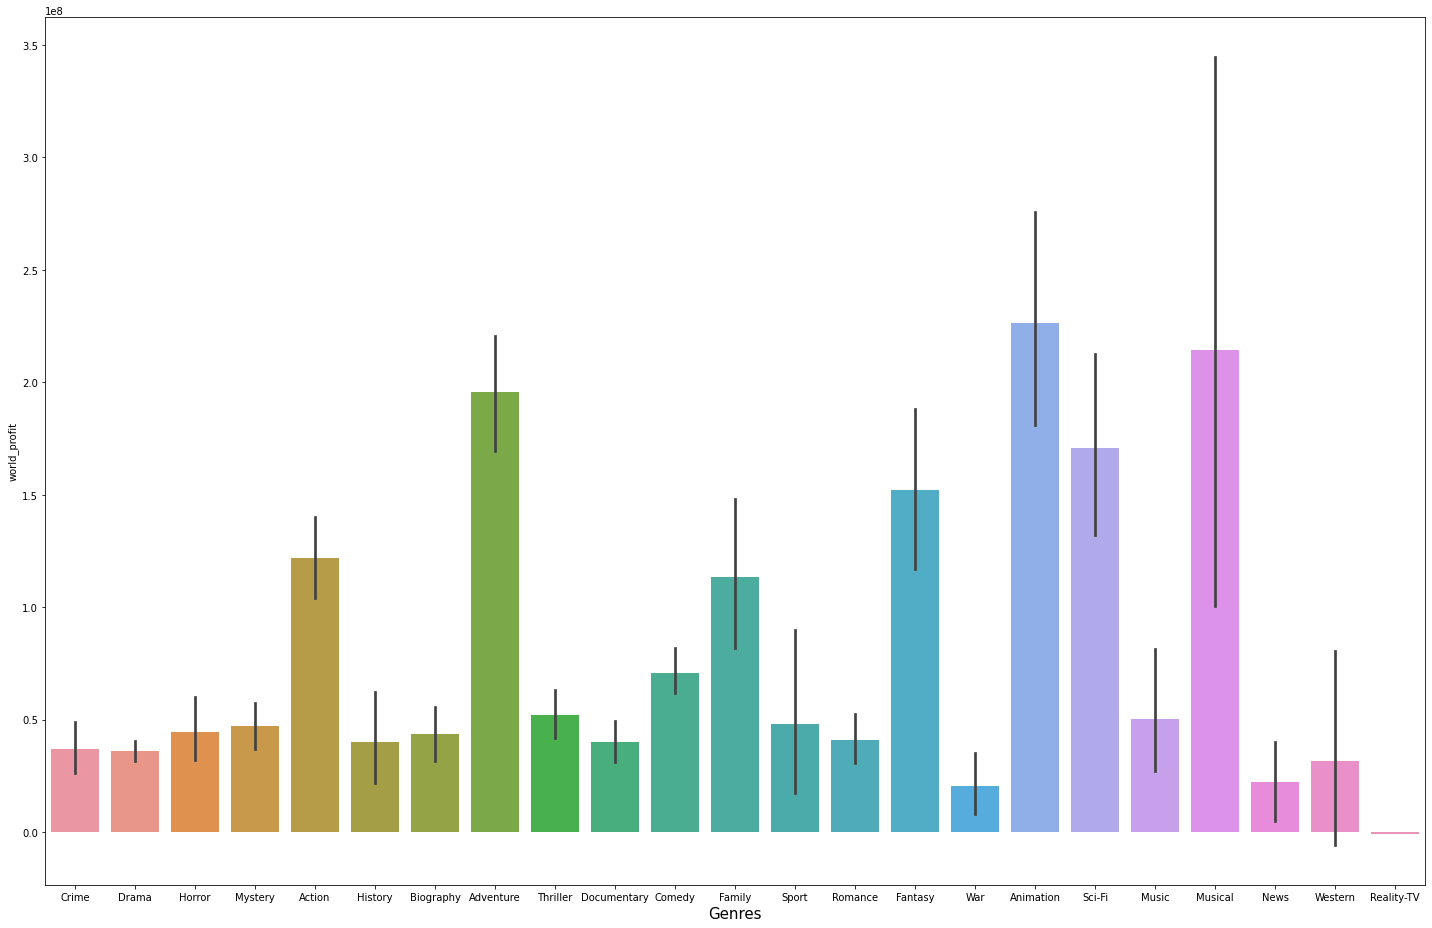

In [107]:
# here we are creating a bar chart to compare the genres with the profit of each movie (world_profit)
fig, ax = plt.subplots(figsize = (20,13))
sns.barplot(x = 'genres', y = 'world_profit', data = df,  ax = ax)
ax.set_xlabel('Genres', fontsize=15)
plt.tick_params(labelsize=10)
fig.tight_layout();

In [108]:
# the genres that generated most profit
new_df = df.query("genres in ('Action','Adventure', 'Family', 'Fantasy', 'Animation', 'Sci-Fi')")

In [109]:
new_df = new_df.sort_values('world_profit')

In [110]:
new_df

,title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,world_profit
1342,Dark Phoenix,2019,113.00000,Action,3,"Jun 7, 2019",350000000.00000,42762350.00000,149762350.00000,-200237650.00000
1343,Dark Phoenix,2019,113.00000,Adventure,3,"Jun 7, 2019",350000000.00000,42762350.00000,149762350.00000,-200237650.00000
1344,Dark Phoenix,2019,113.00000,Sci-Fi,3,"Jun 7, 2019",350000000.00000,42762350.00000,149762350.00000,-200237650.00000
3351,Mars Needs Moms,2011,88.00000,Family,94,"Mar 11, 2011",150000000.00000,21392758.00000,39549758.00000,-110450242.00000
3349,Mars Needs Moms,2011,88.00000,Adventure,94,"Mar 11, 2011",150000000.00000,21392758.00000,39549758.00000,-110450242.00000
...,...,...,...,...,...,...,...,...,...,...
2892,Jurassic World,2015,124.00000,Adventure,34,"Jun 12, 2015",215000000.00000,652270625.00000,1648854864.00000,1433854864.00000
535,Avengers: Infinity War,2018,149.00000,Sci-Fi,7,"Apr 27, 2018",300000000.00000,678815482.00000,2048134200.00000,1748134200.00000
534,Avengers: Infinity War,2018,149.00000,Adventure,7,"Apr 27, 2018",300000000.00000,678815482.00000,2048134200.00000,1748134200.00000
533,Avengers: Infinity War,2018,149.00000,Action,7,"Apr 27, 2018",300000000.00000,678815482.00000,2048134200.00000,1748134200.00000


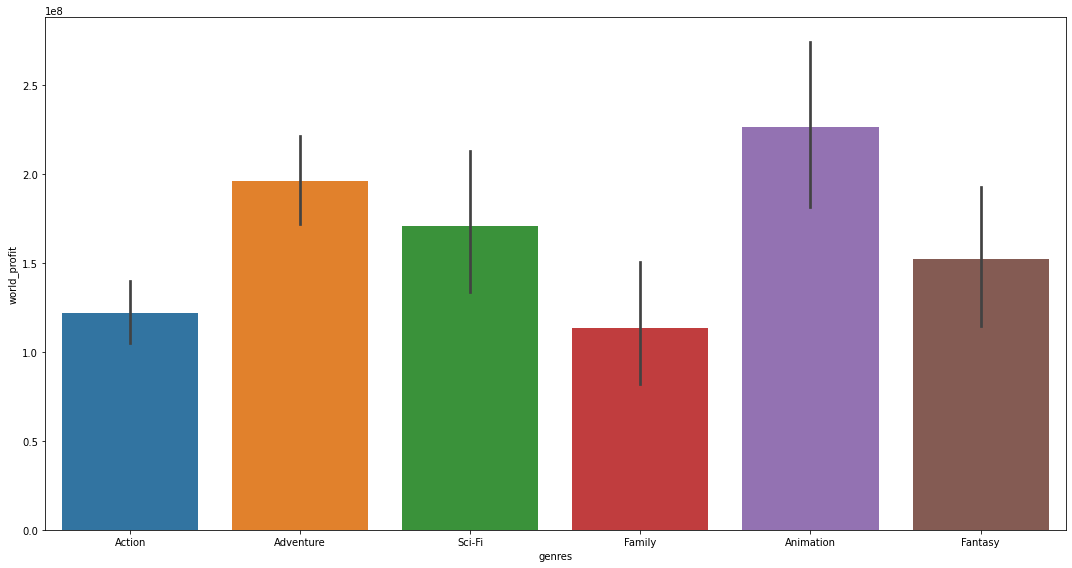

In [111]:
# here we are creating a bar chart for the genres which have generated above 100 million profit
fig, ax = plt.subplots(figsize = (15,8))
sns.barplot(x = 'genres', y = 'world_profit', data = new_df, ax=ax)
ax.set_xlabel('Genres', fontsize=18)
ax.set_ylabel('Profit', fontsize=22)
ax.set_title('Profit per Genre', fontsize = 30)

plt.tick_params(labelsize=10)
fig.tight_layout();